In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(X_train, y_train) , (X_test, y_test) = load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [14]:
# funkcja do wizualizacji dokładności sieci
def plot_accuracy(result):
  plt.figure(figsize=(12,6))
  plt.plot(result.history["accuracy"], c="r")
  plt.plot(result.history["val_accuracy"], c="b")
  plt.legend(["accuracy", "val_accuracy"])
  plt.show()

In [11]:
# budowanie sieci CNN

X_train_cnn = X_train.reshape( X_train.shape[0], 28, 28, 1 )
X_val_cnn = X_val.reshape( X_val.shape[0], 28, 28, 1 )
X_test_cnn = X_test.reshape( X_test.shape[0], 28, 28, 1 )

set_seed(0)
model = Sequential()

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2))  )

model.add( Dropout(.2) )

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

#kompilacja sieci
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
result = model.fit(X_train_cnn, y_train, epochs=15, validation_data=(X_val_cnn, y_val) )

Epoch 1/15
1407/1407 [==============================] - 21s 8ms/step - loss: 0.1629 - accuracy: 0.9512 - val_loss: 0.0702 - val_accuracy: 0.9799
Epoch 2/15
1407/1407 [==============================] - 13s 9ms/step - loss: 0.0615 - accuracy: 0.9818 - val_loss: 0.0601 - val_accuracy: 0.9830
Epoch 3/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.0501 - val_accuracy: 0.9861
Epoch 4/15
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0543 - val_accuracy: 0.9855
Epoch 5/15
1407/1407 [==============================] - 12s 9ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.0526 - val_accuracy: 0.9868
Epoch 6/15
1407/1407 [==============================] - 12s 8ms/step - loss: 0.0229 - accuracy: 0.9934 - val_loss: 0.0547 - val_accuracy: 0.9864
Epoch 7/15
1407/1407 [==============================] - 11s 8ms/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0533 - val_ac

In [12]:
model.evaluate(X_test_cnn, y_test, verbose=0)

[0.0857352465391159, 0.9858999848365784]

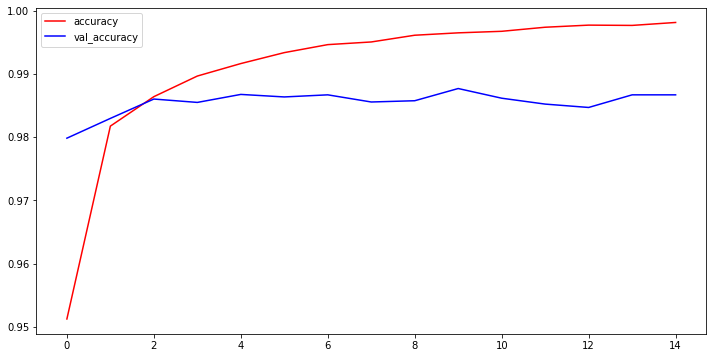

In [15]:
plot_accuracy(result)